### Question 1:

A maze solver algorithm has been generated to traverse the maze shown below. Two methods have been applied, a Backtracking algorithm and a Las Vegas algorithm. Each algorithm is run for 10000 cycles and the driver code allows user input to decide on which method of solving the maze is used.

This is the maze we want to solve:


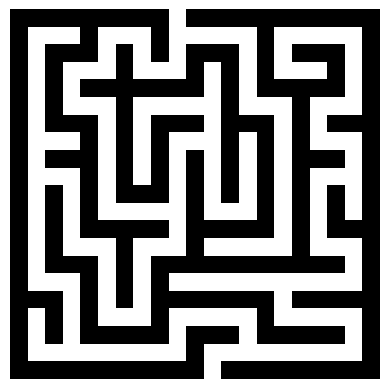

In [23]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as mp
import random

# Open the maze image and assign the width and height
maze = Image.open('maze-2.png').convert('L')
w, h = maze.size

# Ensure all black pixels are 0 and all white pixels are 1
binary = maze.point(lambda p: p > 128 and 1)

# Resize to ensure each cell takes up a single element in the array
compact_maze = binary.resize((w // 10, h // 10), Image.NEAREST)
w, h = compact_maze.size

# Convert to Numpy array
maze = np.array(compact_maze)
visited = np.zeros((21,21))
print("This is the maze we want to solve:")
mp.imshow(maze, cmap='gray')
mp.axis('off')
mp.show()

#### Backtracking Method

The algorithm will decide on a direction to traverse through the graph in a set pattern (defined by the current index of the direction string and the x and y lists). The rotation of directions was decided by placing the characters of the directionn string in alphabetical order. Given more time to test the code would allow the possibility of finding the optimal rotation for this maze, though the rotation would need to be tested again for a new maze. The previous cell is blocked to prevent that direction being selected, being opened again if backtracking is necessary due to the current path being blocked. A new path will be located through available cells, backtracking when needed, until the exit cell has been reached. Any cell reached is recorded in the visited array.

In [24]:
# Variables to control the direction of traversal
direction = "DLRU"
y = [1, 0, 0, -1]
x = [0, -1, 1, 0]

# Function to check if the next cell is clear
def Clear(maze, row, col, size):
    return 0 <= row < size and 0 <= col < size and maze[row][col] == 1

# Backtracking algorithm
def Backtrack(maze, row, col, size, ans, path, visited):
    if row == size-1 and maze[row][col] == 1:
        ans.append(", ".join(path))
        return
    
    maze[row][col] = 0
    visited[row][col] = 2
    for i in range(4):
        next_row = row + y[i]
        next_col = col + x[i]
        if Clear(maze, next_row, next_col, size):
            path += direction[i]
            Backtrack(maze, next_row, next_col, size, ans, path, visited)
            path = path[:-1]

    maze[row][col] = 1  

In [25]:
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []
run = 0
success = 0
while run < 10000:
    Backtrack(maze, 0, 9, size, result, path, visited)
    if result:
        success = success + 1
        result = []
        path = []
    run = run + 1

print(f"The success rate is {int((success / run) * 100)}%")




The success rate is 100%


#### Las Vegas Method

The algorithm will chose a random direction (left, right, up or down) and advance through the graph one cell at a time. Each time the algorithm will pick a new random direction to advance. Each cell reached is recorded in the visited array. The algorithm only returns a success if it reaches the exit cell. This function is calling the same direction, x and y variables as the Backtracking() function. Both algorithms are calling the same Clear() function.

In [26]:
# Las Vegas algorithm
def LasVegas(maze, row, col, size, ans, path, visited):
    steps = 0
    success = False
    while success == False or steps <= 400:
        # Choose random direction
        i = random.randrange(0, 4)
        next_row = row + y[i]
        next_col = col + x[i]

        if Clear(maze, next_row, next_col, size):
            visited[next_row][next_col] = 2
            path.append(direction[i])
            row = next_row
            col = next_col
         
        if row == size - 1 and maze[row][col] == 1:
            ans.append(", ".join(path))
            success = True
        steps = steps + 1
    return None

In [28]:
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []
run = 0
success = 0
while run < 10000:
    LasVegas(maze, 0, 9, size, result, path, visited)
    if result:
        success = success + 1
        result = []
        path = []
    run = run + 1

print(f"The success rate is {int((success / run) * 100)}%")

The success rate is 100%


As implemented, the algorithms above would need to be edited to update the exit cell position if a different maze is used in the initialisation.

The main difference between the two algorithms is the method used to decide on a direction. The Backtracking method rotates through the directions in a set order, with the direction previously travelled being blocked off unless backtracking is necessary. The Las Vegas method chooses the direction randomly, which means going back on itself is possible as much as is needed until the exit or the run limit is reached. The Backtracking algorithm could be optimised by finding the order the directions are chosen which results in traversal of the graph with minimum backtracking necessary, while the Las Vegas algorithm cannot be optimised in this manner due to the random choice taken. Though the Las Vegas approach does have the chance of reaching the exit in the shortest path, it is far from guaranteed, with this approach producing a much longer path of directions than the Backtracking method in all but one instance in my testing.

As can be seen in the code cells beneath each of the maze solver functions, both methods have achieved a 100% success rate over 10000 cycles. The Backtracking algorithm only ends on a success so this is no surprise. It would be expected for the Las Vegas algorithm to result in some failures, though it could be summised that the maze is small enough that the chance of failure over 400 steps is miniscule, perhaps with a larger maze the success rate would be lower than 100%.

I have used primarily NumPy arrays to implement this problem as a matrix has a similar grid structure to the maze, allowing for a the traversal of the matrix to be an analogue to the traversal of the maze. Use of the NumPy arrays allowed for the visualisation of the visited cells to be implemented with ease also as the visited variable could be created as a matrix identical to the maze and edited as the algorithm traverses the maze matrix.

#### Driver Code

The below code allows for a user input in deciding which method is used to solve the graph. The visited matrix is traversed, assigning colours to the values (black for 0, white for 1, green for 2), with all visited cells displaying as green. The path taken to get to the exit and the visited matrix are displayed.

The path to get to the exit is:['D, D, D, L, L, U, U, L, L, D, D, L, L, D, D, R, R, D, D, D, D, D, D, R, R, R, R, D, D, L, L, D, D, D, D, L, L, U, U, U, U, L, L, U, U, U, U, L, L, D, D, D, D, D, D, R, R, D, D, D, D, L, L, U, R, R, R, R, R, R, U, U, R, R, R, R, D, D, L, L, D']

The visited squares while searching for the correct path are shown in green: 


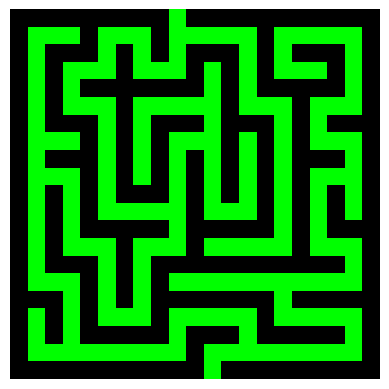

In [20]:
# Setup conditions for the maze solver functions
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []

# Algorithm to select maze solver method via user input
method = input("Would you like to solve the maze using a backtracking or a Las Vegas method? ") 
check = False
while check == False:
    if method == "Backtracking":
        Backtrack(maze, 0, 9, size, result, path, visited)
        check = True
    elif method == "Las Vegas":
        LasVegas(maze, 0, 9, size, result, path, visited)
        check = True
    # Avoiding invalid input
    else:
        method=input("Sorry I didn't recognise that, please enter either Backtracking or Las Vegas: ")

# Mark any unvisited cells in the visited array
for i in range(size):
    for j in range(size):
        if maze[i][j] == 1:
            if visited[i][j] != 2:
                visited[i][j] = 1

print("The path to get to the exit is:" + str(result))
print("")

# Assign colours to specific values
# Black for walls, white for unvisited cells, green for visited cells
colours = {0: np.array([0, 0, 0]), 1: np.array([255, 255, 255]), 2: np.array([0, 255, 0])} 

# Use a 3D array to assign color   
visited_coloured = np.ndarray(shape = (visited.shape[0], visited.shape[1], 3), dtype = int)
for i in range(0, visited.shape[0]):
    for j in range(0, visited.shape[1]):
        visited_coloured[i][j] = colours[visited[i][j]]

print("The visited squares while searching for the correct path are shown in green: ")
mp.imshow(visited_coloured)
mp.axis("off")
mp.show()


### Question 2:

A Minimum Spanning Tree is the result of interpreting a weighter graph and returning a tree spanning each edge, with a total weight of no more than any other spanning tree of the given graph (Sedgewick and Wayne, 2011). The given weighted graph has been displayed below:

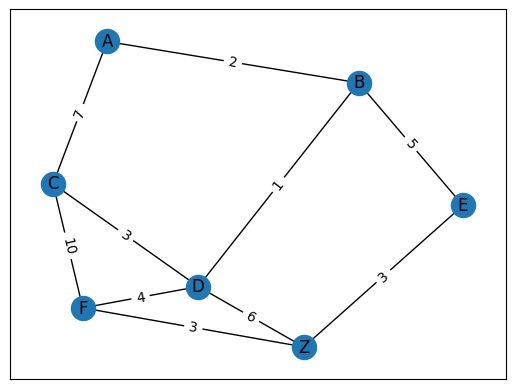

In [11]:
import matplotlib.pyplot as mp
import networkx as nx
import pandas as pd

# Construct the graph
G = nx.Graph()
nodes = ["A", "B", "C", "D", "E", "F","Z"]
G.add_nodes_from(nodes)
G.add_edge("A", "B", weight = 2)
G.add_edge("A", "C", weight = 7)
G.add_edge("B", "D", weight = 1)
G.add_edge("B", "E", weight = 5)
G.add_edge("C", "D", weight = 3)
G.add_edge("C", "F", weight = 10)
G.add_edge("D", "F", weight = 4)
G.add_edge("D", "Z", weight = 6)
G.add_edge("E", "Z", weight = 3)
G.add_edge("F", "Z", weight = 3)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, style = "solid")
nx.draw_networkx_labels(G, pos)
weight = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, weight)
mp.show()

To aid in traversal, the graph was initially converted to a Pandas DataFrame and further converted to a NumPy array. Displayed is the resulting adjacency matrix.

In [12]:
# Convert to a Pandas DataFrame
adj_matrix = nx.to_pandas_adjacency(G)

# Convert to a NumPy array for easy iteration
adj_matrix = np.array(adj_matrix).astype(int)
print(adj_matrix)


[[ 0  2  7  0  0  0  0]
 [ 2  0  0  1  5  0  0]
 [ 7  0  0  3  0 10  0]
 [ 0  1  3  0  0  4  6]
 [ 0  5  0  0  0  0  3]
 [ 0  0 10  4  0  0  3]
 [ 0  0  0  6  3  3  0]]


#### MST using Prims Algorithm

Prims algorithm is a method of creating a Minimum Spanning Tree from a connected weighed graph by adding edges connected to nodes already part of the tree (Calverd, 2024). This method has been applied to the above adjacency matrix. Shown below is the updated matrix with only the weights present in the tree populating the matrix. Edges that do not exist in the tree are populated with a value of 0.


In [13]:
# Assign a matrix to store the MST edges.
mst_matrix = np.zeros([7,7]).astype(int)
prim = len(adj_matrix)

# Erase the first column of edges
for row in range(prim):
    for col in range(1):
        adj_matrix[row][col]=0

# Iterate over the nodes, adding the lowest weighted edge each time starting from node A
for stage in range(prim):
    lowest_edge = 0
    row_track = 0
    col_track = 0
    for row in range(stage + 1):
        for col in range(prim):
            if adj_matrix[row][col] != 0:   
                if lowest_edge == 0 or adj_matrix[row][col] < lowest_edge:
                    lowest_edge = adj_matrix[row][col]
                    row_track = row
                    col_track = col               
    mst_matrix[row_track][col_track] = adj_matrix[row_track][col_track]                
    for row in range(prim):
        for col in range(col_track, col_track + 1):
            adj_matrix[row][col] = 0

print(mst_matrix)

[[0 2 0 0 0 0 0]
 [0 0 0 1 5 0 0]
 [0 0 0 0 0 0 0]
 [0 0 3 0 0 4 0]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


To allow the nodes to be labelled on the viaualisation of the tree, the updated matrix is converted back into a Pandas DataFrame.

In [ ]:
# Convert back to a Pandas DataFrame
mst_labelled = pd.DataFrame(mst_matrix, index = ["A", "B", "C", "D", "E", "F", "Z"], columns = ["A", "B", "C", "D", "E", "F", "Z"])
print(mst_labelled)


   A  B  C  D  E  F  Z
A  0  2  0  0  0  0  0
B  0  0  0  1  5  0  0
C  0  0  0  0  0  0  0
D  0  0  3  0  0  4  0
E  0  0  0  0  0  0  3
F  0  0  0  0  0  0  0
Z  0  0  0  0  0  0  0


A NetworkX graph is constructed from the Pandas DataFrame to visualise the Minimum Spanning Tree. The total weight of the tree is calculated and displayed below the visualisation of the tree.

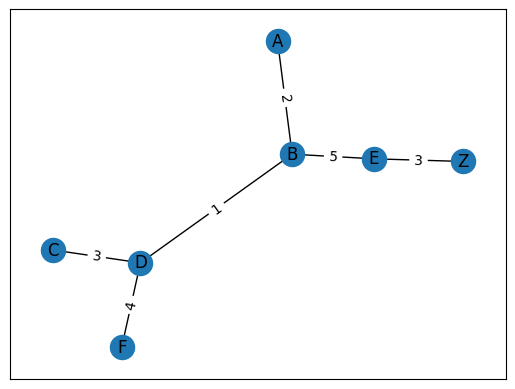

The total weight of the MST is: 18


In [ ]:
#Gather data from the DataFrame
mst = nx.from_pandas_adjacency(mst_labelled)

# Construct the tree with weighted labels
pos = nx.spring_layout(mst)
nx.draw_networkx_nodes(mst, pos)
nx.draw_networkx_edges(mst, pos, style = "solid")
nx.draw_networkx_labels(mst, pos)
weight = nx.get_edge_attributes(mst, "weight")
nx.draw_networkx_edge_labels(mst, pos, weight)
mp.show()

# Sum the wieghts
count = len(mst_matrix)
mst_total_weight = 0
for row in range(count):
    for col in range(count):
        mst_total_weight = mst_total_weight + mst_matrix[row][col]

print(f"The total weight of the MST is: {mst_total_weight}")


### Question 3:
The Quick Sort algorithm is a particularly fast sorting method, with no additional storage needed than the list of values to be sorted (Hoare, 1961). The example below utilises the Hoare Partition Scheme (Hoare, 1961). With the addition of the pivot being fixed as the midpoint of the values with the first and last index in each partition, using floor division.

The Partition function has one index at either side of the list, incrementing into the list until both are equal to the index of the pivot point; the values less than the pivot are to the left of the pivot; and the values greater than the pivot are to the right of the pivot. The QuickSort function calls the partition function on the entire list, then on each half recursively until the entire list is sorted.

#### Pseudocode


    Partition(list, low, high)
        pivot := middle element of list
        low_index := low - 1
        high_index := high + 1

        Loop forever
            increment low_index by 1
            while list[low_index] < pivot
                increment low_index by 1
            decrement high_index by 1
            while list[high_index] > pivot
                decrement high_index by 1
            if low_index >= high_index
                return high_index
            else
                swap list[low_index] and list[high_index] 

    QuickSort(list, low, high)
        if low < high
            pivot_index := Partition(list, low, high)
            QuickSort(list, low, pivot_index) //partition and sort the elements left of the pivot
            QuickSort(list, pivot_index + 1, high) //partition and sort the elements right of the pivot

#### Algorithm

In [ ]:
def Partition(list, low, high):
    pivot = list[(low + high) // 2] # Midpoint of the current partition
    low_index = low - 1 
    high_index = high + 1

    while True:
        low_index = low_index + 1
        # Increment first index
        while list[low_index] < pivot: # Reverse the sign to change the sort order
            low_index = low_index + 1
        high_index = high_index - 1
        # Decrement second index
        while list[high_index] > pivot: # Reverse the sign to change the sort order
            high_index = high_index - 1
        # Check if the values have been partitioned with respect to the pivot
        if low_index >= high_index:
            return high_index
        # Swap the values to the correct partitions
        list[low_index], list[high_index] = list[high_index], list[low_index]

def QuickSort(list, low, high):
    if low < high:
        # Partition the values with respect to the pivot
        pivot_index = Partition(list, low, high)
        # Sort the lower values partition
        QuickSort(list, low, pivot_index)
        # Sort the higher values partition
        QuickSort(list, pivot_index + 1, high)

# Example driver code using a list of integers to be sorted in ascending order
integers = [9, 1, 8, 7, 4, 3, 6, 2]
QuickSort(integers, 0, len(integers) - 1)
print(integers)

# Example driver code using a list of cities to be sorted alphabetically
cities = ["London", "Paris", "Rome", "Canberra", "Brussels"]
QuickSort(cities, 0, len(cities) - 1)
print(cities)

[1, 2, 3, 4, 6, 7, 8, 9]
['Brussels', 'Canberra', 'London', 'Paris', 'Rome']


An alternative partitioning method would be Lomuto's Partiton Scheme. This algorithm offers simpler implementation though is more inefficient than Hoare's Scheme (Iyer, 2024). 

Quick Sort can be implemented without an in-place method if desired. By using lists, the left and right partitions can be stored, then recursively partitioned and combined back into a single list once the sorting is complete (Ahamed Kitthu, 2024).

### Question 4:
The algorithm below first formats a string into all lowercase letters to allow comparison of all characters. If the string is only a signle character then it is by definition a palindrome, so no processing is required. If the string is longer, the function is recursively called to compare the outermost characters, progressing towards the centre character(s). If all characters can be successfully confirmed as matching then the function will return true, otherwise it will return false.

In [324]:
def isPalindrome(palindrome):
    #standardise the case to ensure all characters can be compared
    palindrome=palindrome.lower() 
    #identify a string of only one character or if the recursive algorithm has successfully reached the centre of the string
    if len(palindrome)<2: 
        return True
    if palindrome[0]==palindrome[len(palindrome)-1]:
        return isPalindrome(palindrome[1:len(palindrome)-1])
    #not a palindrome
    else:
        return False

An example of calling the function with a non-palindrome:

In [325]:
a="Horticulture"
if isPalindrome(a):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is not a palindrome.


With a palindrome:

In [326]:
b="Detartrated"
if isPalindrome(b):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is a palindrome.


With a user-inputted string, the input used was "Rotator":

In [328]:
c=input("Enter a word to check if it is a palindrome.")
if isPalindrome(c):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is not a palindrome.


### Question 5

The Needleman-Wunsch string alignment algorithm was performed on the strings CATGATAA and ATACATA. The steps taken are as follows:

The first row and column of the matrix were initialised:

![Initiaiised Matrix](Initialise.png)

Below is the completed score matrix:

![Score Matrix](ScoreMatrix.png)

There were 5 valid traceback paths and string alignments, each can be seen below:

![Traceback 1](Traceback1.png)

![Traceback 2](Traceback2.png)

![Traceback 3](Traceback3.png)

![Traceback 4](Traceback4.png)

![Traceback 5](Traceback5.png)

### References

Ahamed Kitthu, H. (2024). *What is Quick Sort Algorithm: How does it work and its Implementation* | *Simplilearn.* [online] Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/data-structure-tutorial/quick-sort-algorithm.

Calverd, N. (2024). *Prim’s Algorithm* | *Edexcel A Level Further Maths: Decision Maths 1 Revision Notes 2017.* [online] Save My Exams. Available at: https://www.savemyexams.com/a-level/further-maths_decision-maths-1/edexcel/17/revision-notes/algorithms-on-graphs/minimum-spanning-trees/prims-algorithm/.

Hoare, C. A. R. (1961). Algorithm 64: quicksort. *Communications of the ACM, 4*(7), 321.

Hoare, C. A. R. (1961). Algorithm 63: partition. *Communications of the ACM, 4*(7), 321.

Iyer, S. (2024). *Hoare’s vs. Lomuto’s Partition Scheme in Quicksort.* [online] Interviewkickstart.com. Available at: https://www.interviewkickstart.com/blogs/learn/hoares-vs-lomuto-partition-scheme-quicksort.

Sedgewick, R. and Wayne, K. (2011). *Algorithms.* Upper Saddle River, Nj: Addison-Wesley.